In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Display the first 5 rows
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Dataset info
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nClass Distribution (Species counts):")
print(df["Species"].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.10000

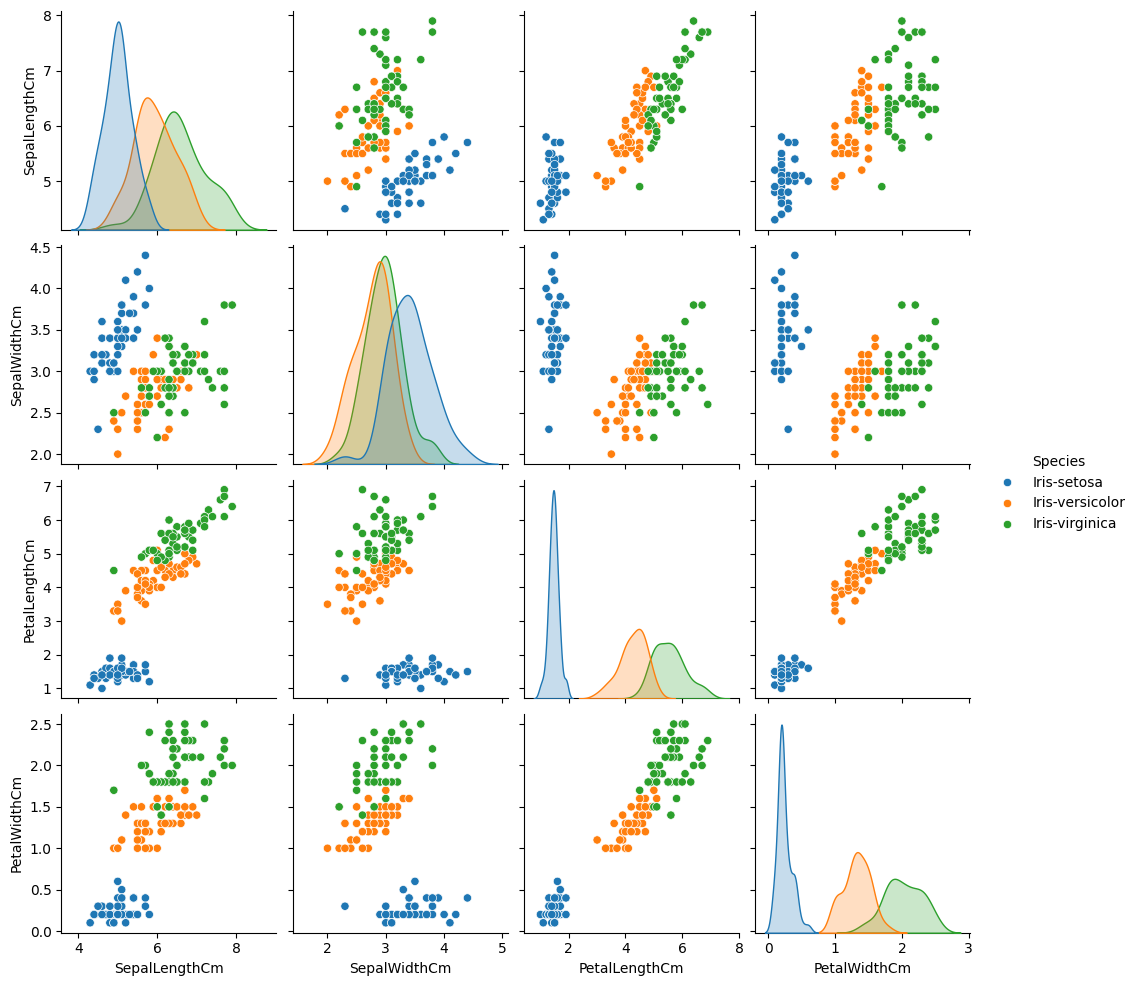

In [7]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue="Species")
plt.show()


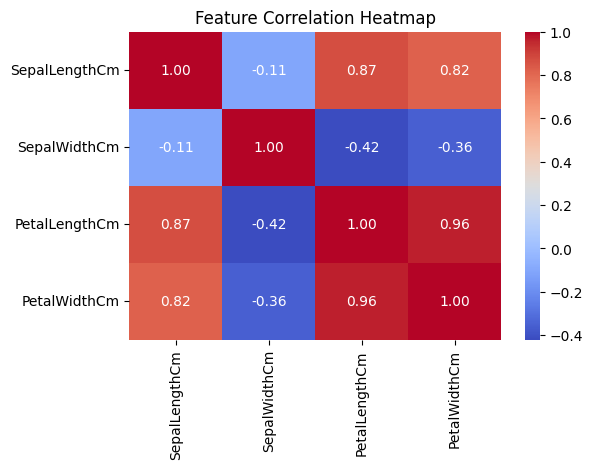

In [8]:
# Correlation heatmap of numerical features
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
# Drop only 'Species' (Id may not exist in your dataset)
X = df.drop(columns=["Species"])

# Target variable
y = df["Species"]

# Show shapes
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (150, 4)
Labels shape: (150,)


In [15]:
# Drop 'Id' column (not useful for prediction)
X = df.drop(["Id", "Species"], axis=1)

# Target variable
y = df["Species"]

# Show shapes
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


KeyError: "['Id'] not found in axis"

In [11]:
# If 'Id' column exists, drop it; otherwise just drop 'Species'
if "Id" in df.columns:
    X = df.drop(["Id", "Species"], axis=1)
else:
    X = df.drop(["Species"], axis=1)

# Target variable
y = df["Species"]

# Show shapes
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (150, 4)
Labels shape: (150,)


In [16]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (120, 4)
Testing set shape: (30, 4)


In [17]:
# Standardize features (mean = 0, std = 1)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling complete ✅")


Feature scaling complete ✅


In [18]:
# Train KNN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("KNN model trained ✅")


KNN model trained ✅


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("KNN model trained ✅")


KNN model trained ✅


In [20]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

print("Sample Predictions:", y_pred[:10])


Sample Predictions: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy: 1.0


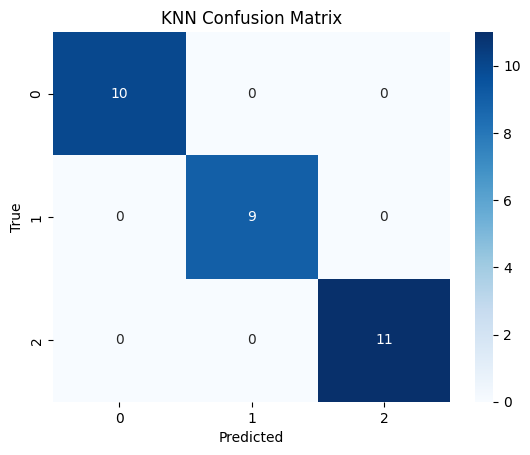

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN Confusion Matrix")
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
param_grid = {"n_neighbors": [1, 3, 5, 7, 9]}

# Grid Search with 5-fold Cross Validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Parameters: {'n_neighbors': 3}
Best Cross-Validation Score: 0.95


In [24]:
# Use the best model from GridSearchCV
best_knn = grid.best_estimator_

# Predictions with best KNN
y_pred_best = best_knn.predict(X_test)

# Final Accuracy
print("Final Accuracy with Best KNN:", accuracy_score(y_test, y_pred_best))


Final Accuracy with Best KNN: 1.0


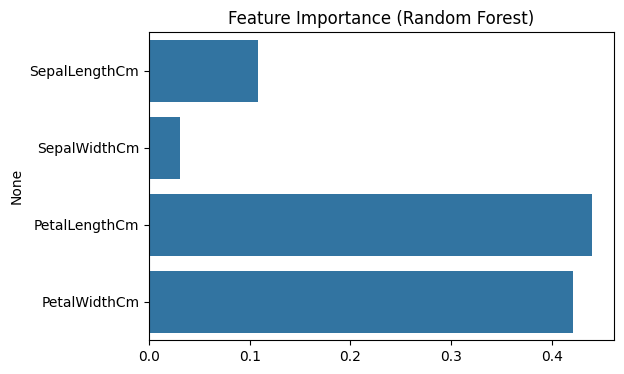

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()


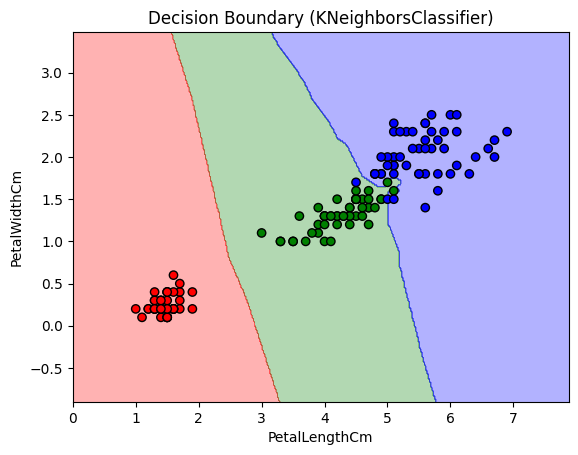

In [27]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

def plot_decision_boundary(X, y, model, feature1, feature2):
    # Encode species into numbers (setosa=0, versicolor=1, virginica=2)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Take only 2 features for plotting
    X_plot = X[[feature1, feature2]].values

    # Fit the model on just these 2 features
    model.fit(X_plot, y_encoded)

    # Define grid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_encoded,
                edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"Decision Boundary ({type(model).__name__})")
    plt.show()

# Plot KNN decision boundary using PetalLength & PetalWidth
plot_decision_boundary(df, df["Species"], KNeighborsClassifier(n_neighbors=3),
                       "PetalLengthCm", "PetalWidthCm")
